In [2]:
# Set up Notebook
%matplotlib inline

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings('ignore')


# Standard imports

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import cm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


In [16]:
url_mw = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/dataset/mw_dataset_hh.csv'
mw_hh = pd.read_csv(url_mw)
mw_hh= mw_hh.drop(columns=['FNID','lhz_day1rain','gdd','tmean','lhz_raincytot','lhz_maxdaysnorain','heatdays','floodmax','lhz_floodmax'])

In [27]:
url_tz = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/dataset/tz_dataset_hh.csv'
tz_hh = pd.read_csv(url_tz)
tz_hh= tz_hh.drop(columns=['FNID','lhz_day1rain','gdd','tmean','lhz_raincytot','lhz_maxdaysnorain','heatdays','floodmax','lhz_floodmax'])

In [35]:
url_ug = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/dataset/ug_dataset_hh.csv'
ug_hh = pd.read_csv(url_ug)
ug_hh= ug_hh.drop(columns=['FNID','lhz_day1rain','gdd','tmean','lhz_raincytot','lhz_maxdaysnorain','floodmax','lhz_floodmax'])

In [36]:
ug_hh.shape

(8883, 42)

In [37]:
ug_hh.drop_duplicates().shape

(6507, 42)

In [38]:
ug_hh_dataset = ug_hh.drop_duplicates()

In [23]:
mw_hh_dataset.shape

(18579, 101)

In [33]:
tz_hh_dataset.to_csv('data/clean/dataset/tz_dataset_hh_nodup.csv',index=False)

In [3]:
mw_hh_dataset.to_csv('data/clean/dataset/mw_dataset_hh_nodup.csv',index=False)

NameError: name 'mw_hh_dataset' is not defined

In [39]:
ug_hh_dataset.to_csv('data/clean/dataset/ug_dataset_hh_nodup.csv',index=False)

In [56]:
# Malawi Data
url_mw = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/dataset/mw_dataset_cluster.csv'
mw_village = pd.read_csv(url_mw)
#mw_village = mw_village.drop(['yearmon','FNID','lat_modified','lon_modified'],axis=1)


# Tanzania Data 
url_tz = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/dataset/tz_dataset_cluster.csv'
tz_village = pd.read_csv(url_tz)

# Uganda Data 
url_ug = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/dataset/ug_dataset_cluster.csv'
ug_village = pd.read_csv(url_ug)


ug_village = ug_village.replace([np.inf, -np.inf], np.nan)

# Malawi household Data
url_mw_hh = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/household/mw_hh_aggregate.csv'
mw_hh = pd.read_csv(url_mw_hh)

 
# Tanzania household Data 
url_tz_hh = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/household/tz_hh_aggregate.csv'
tz_hh = pd.read_csv(url_tz_hh)
tz_hh=tz_hh.rename(index=str, columns={"clusterid": "ea_id"})

# Uganda household Data 
url_ug_hh = 'https://raw.githubusercontent.com/zhou100/FoodSecurityPrediction/master/data/clean/household/ug_hh_aggregate.csv'
ug_hh = pd.read_csv(url_ug_hh)
ug_hh = ug_hh[["HHID","FCS","FS_month","FS_year","ea_id"]] 
 

# check for any missing values (should return false)
print(ug_village.isnull().values.any())
print(tz_village.isnull().values.any())
print(mw_village.isnull().values.any())


# check for any missing values (should return false)
print(ug_hh.isnull().values.any())

False
False
True
False


In [9]:
mw_village = mw_village.drop(columns=['FCS_mid_count', 'FCS_mid_percent', 'FCS_low_count', 'FCS_low_percent',
       'FCS_mid+low', 'FCS_3_category', 'FCS_binary_category',
       'rCSI_mid_count', 'rCSI_mid_percent', 'rCSI_low_count',
       'rCSI_low_percent', 'rCSI_mid+low', 'rCSI_3_category',
       'rCSI_binary_category'])

Index(['Unnamed: 0', 'ea_id', 'FS_year', 'FCS', 'HDDS', 'rCSI', 'region_north',
       'region_central', 'rural', 'lat_modified', 'lon_modified', 'dist_road',
       'dist_admarc', 'dist_popcenter', 'percent_ag'],
      dtype='object')

In [11]:
mw_outcomes = mw_village[['ea_id','lat_modified', 'lon_modified', 'FS_year', 'FCS', 'HDDS', 'rCSI','FCS_mid_count', 'FCS_mid_percent', 'FCS_low_count', 'FCS_low_percent',
       'FCS_mid+low', 'FCS_3_category', 'FCS_binary_category',
       'rCSI_mid_count', 'rCSI_mid_percent', 'rCSI_low_count',
       'rCSI_low_percent', 'rCSI_mid+low', 'rCSI_3_category',
       'rCSI_binary_category']]

mw_outcomes.to_csv("data/clean/dataset/mw_outcomes.csv")

In [7]:
mw_village.columns[100:]

Index(['maxdaysnorain', 'lhz_day1rain', 'gdd', 'tmean', 'lhz_raincytot',
       'lhz_maxdaysnorain', 'heatdays', 'floodmax', 'lhz_floodmax',
       'FCS_mid_count', 'FCS_mid_percent', 'FCS_low_count', 'FCS_low_percent',
       'FCS_mid+low', 'FCS_3_category', 'FCS_binary_category',
       'rCSI_mid_count', 'rCSI_mid_percent', 'rCSI_low_count',
       'rCSI_low_percent', 'rCSI_mid+low', 'rCSI_3_category',
       'rCSI_binary_category'],
      dtype='object')

In [14]:
mw_no_asset_no_price = mw_hh.drop(columns= ['head_age','female_head','hhsize','floor_dirt_sand_dung','cell_phone', 'number_celphones', 'roof_not_natural', 'roof_iron',
       'Refrigerator', 'Radio', 'Television', 'Bicycle', 'Motorcycle', 'Car','lag1_clust_maize_price', 'lag1_clust_rice_price',
       'lag1_clust_nuts_price', 'lag1_clust_beans_price',
       'lag1_clust_maize_mktthin', 'lag1_clust_rice_mktthin',
       'lag1_clust_nuts_mktthin', 'lag1_clust_beans_mktthin','lag1_lhz_maize_price', 'lag1_lhz_rice_price', 'lag1_lhz_nuts_price',
       'lag1_lhz_beans_price', 'lag1_lhz_maize_mktthin',
       'lag1_lhz_rice_mktthin', 'lag1_lhz_nuts_mktthin',
       'lag1_lhz_beans_mktthin','lag3_clust_maize_price',
       'lag3_clust_rice_price', 'lag3_clust_nuts_price',
       'lag3_clust_beans_price', 'lag3_clust_maize_mktthin',
       'lag3_clust_rice_mktthin', 'lag3_clust_nuts_mktthin',
       'lag3_clust_beans_mktthin', 'lag3_lhz_maize_price',
       'lag3_lhz_rice_price', 'lag3_lhz_nuts_price', 'lag3_lhz_beans_price',
       'lag3_lhz_maize_mktthin', 'lag3_lhz_rice_mktthin',
       'lag3_lhz_nuts_mktthin', 'lag3_lhz_beans_mktthin',
       'lag6_clust_maize_price', 'lag6_clust_rice_price',
       'lag6_clust_nuts_price', 'lag6_clust_beans_price',
       'lag6_clust_maize_mktthin', 'lag6_clust_rice_mktthin',
       'lag6_clust_nuts_mktthin', 'lag6_clust_beans_mktthin',
       'lag6_lhz_maize_price', 'lag6_lhz_rice_price', 'lag6_lhz_nuts_price',
       'lag6_lhz_beans_price', 'lag6_lhz_maize_mktthin',
       'lag6_lhz_rice_mktthin', 'lag6_lhz_nuts_mktthin',
       'lag6_lhz_beans_mktthin', 'lag12_clust_maize_price',
       'lag12_clust_rice_price', 'lag12_clust_nuts_price',
       'lag12_clust_beans_price', 'lag12_clust_maize_mktthin',
       'lag12_clust_rice_mktthin', 'lag12_clust_nuts_mktthin',
       'lag12_clust_beans_mktthin', 'lag12_lhz_maize_price',
       'lag12_lhz_rice_price', 'lag12_lhz_nuts_price', 'lag12_lhz_beans_price',
       'lag12_lhz_maize_mktthin', 'lag12_lhz_rice_mktthin',
       'lag12_lhz_nuts_mktthin', 'lag12_lhz_beans_mktthin'])

mw_no_asset = mw_village.drop(columns= ['female_head','hhsize','floor_dirt_sand_dung','cell_phone', 'number_celphones', 'roof_not_natural', 'roof_iron',
       'Refrigerator', 'Radio', 'Television', 'Bicycle', 'Motorcycle', 'Car'])

mw_no_asset_lag1 = mw_village.drop(columns= ['female_head','hhsize','floor_dirt_sand_dung','cell_phone', 'number_celphones', 'roof_not_natural', 'roof_iron',
       'Refrigerator', 'Radio', 'Television', 'Bicycle', 'Motorcycle', 'Car','lag3_clust_maize_price',
       'lag3_clust_rice_price', 'lag3_clust_nuts_price',
       'lag3_clust_beans_price', 'lag3_clust_maize_mktthin',
       'lag3_clust_rice_mktthin', 'lag3_clust_nuts_mktthin',
       'lag3_clust_beans_mktthin', 'lag3_lhz_maize_price',
       'lag3_lhz_rice_price', 'lag3_lhz_nuts_price', 'lag3_lhz_beans_price',
       'lag3_lhz_maize_mktthin', 'lag3_lhz_rice_mktthin',
       'lag3_lhz_nuts_mktthin', 'lag3_lhz_beans_mktthin',
       'lag6_clust_maize_price', 'lag6_clust_rice_price',
       'lag6_clust_nuts_price', 'lag6_clust_beans_price',
       'lag6_clust_maize_mktthin', 'lag6_clust_rice_mktthin',
       'lag6_clust_nuts_mktthin', 'lag6_clust_beans_mktthin',
       'lag6_lhz_maize_price', 'lag6_lhz_rice_price', 'lag6_lhz_nuts_price',
       'lag6_lhz_beans_price', 'lag6_lhz_maize_mktthin',
       'lag6_lhz_rice_mktthin', 'lag6_lhz_nuts_mktthin',
       'lag6_lhz_beans_mktthin', 'lag12_clust_maize_price',
       'lag12_clust_rice_price', 'lag12_clust_nuts_price',
       'lag12_clust_beans_price', 'lag12_clust_maize_mktthin',
       'lag12_clust_rice_mktthin', 'lag12_clust_nuts_mktthin',
       'lag12_clust_beans_mktthin', 'lag12_lhz_maize_price',
       'lag12_lhz_rice_price', 'lag12_lhz_nuts_price', 'lag12_lhz_beans_price',
       'lag12_lhz_maize_mktthin', 'lag12_lhz_rice_mktthin',
       'lag12_lhz_nuts_mktthin', 'lag12_lhz_beans_mktthin'])

mw_village_lag1 = mw_village.drop(columns= ['lag3_clust_maize_price',
       'lag3_clust_rice_price', 'lag3_clust_nuts_price',
       'lag3_clust_beans_price', 'lag3_clust_maize_mktthin',
       'lag3_clust_rice_mktthin', 'lag3_clust_nuts_mktthin',
       'lag3_clust_beans_mktthin', 'lag3_lhz_maize_price',
       'lag3_lhz_rice_price', 'lag3_lhz_nuts_price', 'lag3_lhz_beans_price',
       'lag3_lhz_maize_mktthin', 'lag3_lhz_rice_mktthin',
       'lag3_lhz_nuts_mktthin', 'lag3_lhz_beans_mktthin',
       'lag6_clust_maize_price', 'lag6_clust_rice_price',
       'lag6_clust_nuts_price', 'lag6_clust_beans_price',
       'lag6_clust_maize_mktthin', 'lag6_clust_rice_mktthin',
       'lag6_clust_nuts_mktthin', 'lag6_clust_beans_mktthin',
       'lag6_lhz_maize_price', 'lag6_lhz_rice_price', 'lag6_lhz_nuts_price',
       'lag6_lhz_beans_price', 'lag6_lhz_maize_mktthin',
       'lag6_lhz_rice_mktthin', 'lag6_lhz_nuts_mktthin',
       'lag6_lhz_beans_mktthin', 'lag12_clust_maize_price',
       'lag12_clust_rice_price', 'lag12_clust_nuts_price',
       'lag12_clust_beans_price', 'lag12_clust_maize_mktthin',
       'lag12_clust_rice_mktthin', 'lag12_clust_nuts_mktthin',
       'lag12_clust_beans_mktthin', 'lag12_lhz_maize_price',
       'lag12_lhz_rice_price', 'lag12_lhz_nuts_price', 'lag12_lhz_beans_price',
       'lag12_lhz_maize_mktthin', 'lag12_lhz_rice_mktthin',
       'lag12_lhz_nuts_mktthin', 'lag12_lhz_beans_mktthin'])


mw_village_lag1_and_12 = mw_village.drop(columns= ['lag3_clust_maize_price',
       'lag3_clust_rice_price', 'lag3_clust_nuts_price',
       'lag3_clust_beans_price', 'lag3_clust_maize_mktthin',
       'lag3_clust_rice_mktthin', 'lag3_clust_nuts_mktthin',
       'lag3_clust_beans_mktthin', 'lag3_lhz_maize_price',
       'lag3_lhz_rice_price', 'lag3_lhz_nuts_price', 'lag3_lhz_beans_price',
       'lag3_lhz_maize_mktthin', 'lag3_lhz_rice_mktthin',
       'lag3_lhz_nuts_mktthin', 'lag3_lhz_beans_mktthin',
       'lag6_clust_maize_price', 'lag6_clust_rice_price',
       'lag6_clust_nuts_price', 'lag6_clust_beans_price',
       'lag6_clust_maize_mktthin', 'lag6_clust_rice_mktthin',
       'lag6_clust_nuts_mktthin', 'lag6_clust_beans_mktthin',
       'lag6_lhz_maize_price', 'lag6_lhz_rice_price', 'lag6_lhz_nuts_price',
       'lag6_lhz_beans_price', 'lag6_lhz_maize_mktthin',
       'lag6_lhz_rice_mktthin', 'lag6_lhz_nuts_mktthin',
       'lag6_lhz_beans_mktthin'])

mw_village_lag3 = mw_village.drop(columns= ['lag1_clust_maize_price',
       'lag1_clust_rice_price', 'lag1_clust_nuts_price',
       'lag1_clust_beans_price', 'lag1_clust_maize_mktthin',
       'lag1_clust_rice_mktthin', 'lag1_clust_nuts_mktthin',
       'lag1_clust_beans_mktthin', 'lag1_lhz_maize_price',
       'lag1_lhz_rice_price', 'lag1_lhz_nuts_price', 'lag1_lhz_beans_price',
       'lag1_lhz_maize_mktthin', 'lag1_lhz_rice_mktthin',
       'lag1_lhz_nuts_mktthin', 'lag1_lhz_beans_mktthin',
       'lag6_clust_maize_price', 'lag6_clust_rice_price',
       'lag6_clust_nuts_price', 'lag6_clust_beans_price',
       'lag6_clust_maize_mktthin', 'lag6_clust_rice_mktthin',
       'lag6_clust_nuts_mktthin', 'lag6_clust_beans_mktthin',
       'lag6_lhz_maize_price', 'lag6_lhz_rice_price', 'lag6_lhz_nuts_price',
       'lag6_lhz_beans_price', 'lag6_lhz_maize_mktthin',
       'lag6_lhz_rice_mktthin', 'lag6_lhz_nuts_mktthin',
       'lag6_lhz_beans_mktthin', 'lag12_clust_maize_price',
       'lag12_clust_rice_price', 'lag12_clust_nuts_price',
       'lag12_clust_beans_price', 'lag12_clust_maize_mktthin',
       'lag12_clust_rice_mktthin', 'lag12_clust_nuts_mktthin',
       'lag12_clust_beans_mktthin', 'lag12_lhz_maize_price',
       'lag12_lhz_rice_price', 'lag12_lhz_nuts_price', 'lag12_lhz_beans_price',
       'lag12_lhz_maize_mktthin', 'lag12_lhz_rice_mktthin',
       'lag12_lhz_nuts_mktthin', 'lag12_lhz_beans_mktthin'])


mw_village_lag6 = mw_village.drop(columns= ['lag1_clust_maize_price',
       'lag1_clust_rice_price', 'lag1_clust_nuts_price',
       'lag1_clust_beans_price', 'lag1_clust_maize_mktthin',
       'lag1_clust_rice_mktthin', 'lag1_clust_nuts_mktthin',
       'lag1_clust_beans_mktthin', 'lag1_lhz_maize_price',
       'lag1_lhz_rice_price', 'lag1_lhz_nuts_price', 'lag1_lhz_beans_price',
       'lag1_lhz_maize_mktthin', 'lag1_lhz_rice_mktthin',
       'lag1_lhz_nuts_mktthin', 'lag1_lhz_beans_mktthin',
        'lag3_clust_maize_price', 'lag3_clust_rice_price',
       'lag3_clust_nuts_price', 'lag3_clust_beans_price',
       'lag3_clust_maize_mktthin', 'lag3_clust_rice_mktthin',
       'lag3_clust_nuts_mktthin', 'lag3_clust_beans_mktthin',
       'lag3_lhz_maize_price', 'lag3_lhz_rice_price', 'lag3_lhz_nuts_price',
       'lag3_lhz_beans_price', 'lag3_lhz_maize_mktthin',
       'lag3_lhz_rice_mktthin', 'lag3_lhz_nuts_mktthin',  'lag6_clust_maize_price', 'lag6_clust_rice_price',
       'lag6_clust_nuts_price', 'lag6_clust_beans_price',
       'lag6_clust_maize_mktthin', 'lag6_clust_rice_mktthin',
       'lag6_clust_nuts_mktthin', 'lag6_clust_beans_mktthin',
       'lag6_lhz_maize_price', 'lag6_lhz_rice_price', 'lag6_lhz_nuts_price',
       'lag6_lhz_beans_price', 'lag6_lhz_maize_mktthin',
       'lag6_lhz_rice_mktthin', 'lag6_lhz_nuts_mktthin'])


mw_village_lag12 = mw_village.drop(columns= ['lag1_clust_maize_price',
       'lag1_clust_rice_price', 'lag1_clust_nuts_price',
       'lag1_clust_beans_price', 'lag1_clust_maize_mktthin',
       'lag1_clust_rice_mktthin', 'lag1_clust_nuts_mktthin',
       'lag1_clust_beans_mktthin', 'lag1_lhz_maize_price',
       'lag1_lhz_rice_price', 'lag1_lhz_nuts_price', 'lag1_lhz_beans_price',
       'lag1_lhz_maize_mktthin', 'lag1_lhz_rice_mktthin',
       'lag1_lhz_nuts_mktthin', 'lag1_lhz_beans_mktthin',
        'lag3_clust_maize_price', 'lag3_clust_rice_price',
       'lag3_clust_nuts_price', 'lag3_clust_beans_price',
       'lag3_clust_maize_mktthin', 'lag3_clust_rice_mktthin',
       'lag3_clust_nuts_mktthin', 'lag3_clust_beans_mktthin',
       'lag3_lhz_maize_price', 'lag3_lhz_rice_price', 'lag3_lhz_nuts_price',
       'lag3_lhz_beans_price', 'lag3_lhz_maize_mktthin',
       'lag3_lhz_rice_mktthin', 'lag3_lhz_nuts_mktthin'])

mw_no_prices= mw_village.drop(columns= ['lag1_clust_maize_price', 'lag1_clust_rice_price',
       'lag1_clust_nuts_price', 'lag1_clust_beans_price',
       'lag1_clust_maize_mktthin', 'lag1_clust_rice_mktthin',
       'lag1_clust_nuts_mktthin', 'lag1_clust_beans_mktthin','lag1_lhz_maize_price', 'lag1_lhz_rice_price', 'lag1_lhz_nuts_price',
       'lag1_lhz_beans_price', 'lag1_lhz_maize_mktthin',
       'lag1_lhz_rice_mktthin', 'lag1_lhz_nuts_mktthin',
       'lag1_lhz_beans_mktthin','lag3_clust_maize_price',
       'lag3_clust_rice_price', 'lag3_clust_nuts_price',
       'lag3_clust_beans_price', 'lag3_clust_maize_mktthin',
       'lag3_clust_rice_mktthin', 'lag3_clust_nuts_mktthin',
       'lag3_clust_beans_mktthin', 'lag3_lhz_maize_price',
       'lag3_lhz_rice_price', 'lag3_lhz_nuts_price', 'lag3_lhz_beans_price',
       'lag3_lhz_maize_mktthin', 'lag3_lhz_rice_mktthin',
       'lag3_lhz_nuts_mktthin', 'lag3_lhz_beans_mktthin',
       'lag6_clust_maize_price', 'lag6_clust_rice_price',
       'lag6_clust_nuts_price', 'lag6_clust_beans_price',
       'lag6_clust_maize_mktthin', 'lag6_clust_rice_mktthin',
       'lag6_clust_nuts_mktthin', 'lag6_clust_beans_mktthin',
       'lag6_lhz_maize_price', 'lag6_lhz_rice_price', 'lag6_lhz_nuts_price',
       'lag6_lhz_beans_price', 'lag6_lhz_maize_mktthin',
       'lag6_lhz_rice_mktthin', 'lag6_lhz_nuts_mktthin',
       'lag6_lhz_beans_mktthin', 'lag12_clust_maize_price',
       'lag12_clust_rice_price', 'lag12_clust_nuts_price',
       'lag12_clust_beans_price', 'lag12_clust_maize_mktthin',
       'lag12_clust_rice_mktthin', 'lag12_clust_nuts_mktthin',
       'lag12_clust_beans_mktthin', 'lag12_lhz_maize_price',
       'lag12_lhz_rice_price', 'lag12_lhz_nuts_price', 'lag12_lhz_beans_price',
       'lag12_lhz_maize_mktthin', 'lag12_lhz_rice_mktthin',
       'lag12_lhz_nuts_mktthin', 'lag12_lhz_beans_mktthin'])

In [19]:
def r2(x, y):
    return pearsonr(x, y)[0] ** 2

def df_split(test_year, df):
    df_test = df[df['FS_year']> test_year]
    df_train = df[df['FS_year']< test_year]
    
    X_test = df_test.drop(columns=['ea_id','FS_year','FCS','HDDS','rCSI'])
    y_test = df_test.rCSI
    X_train = df_train.drop(columns=['ea_id','FS_year','FCS','HDDS','rCSI'])
    y_train = df_train.rCSI
    
    return X_test,y_test,X_train,y_train

def lasso_reg(X_test,y_test,X_train,y_train):
    
    lasso_reg = LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
                                0.3, 0.6, 1],
                        max_iter=500, cv=10)
    lasso_reg.fit(X_train,y_train)
    print("Best alpha using built-in LassoCV: %f" % lasso_reg.alpha_)
    print("Best score using built-in LassoCV: %f" % lasso_reg.score(X_train,y_train))

    coef = pd.Series(lasso_reg.coef_, index = X_train.columns)
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
    
    y_pred = lasso_reg.predict(X_test)

    ax = sns.jointplot(x= y_test, y=y_pred,kind="reg", stat_func=r2 )
        
    return coef, ax


def importance_plot(coef):

    imp_coef = coef.sort_values()
    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    plot = imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    
    return plot 


from sklearn.ensemble import RandomForestRegressor

def rf_reg(X_test,y_test,X_train,y_train):
    # rCSI
    rf_reg = RandomForestRegressor(max_features='auto', n_estimators = 500,warm_start=True)

    max_depth = [int(x) for x in np.linspace(12, 30, num = 10)]
    max_features = [int(x) for x in np.linspace(8, 20, num = 10)]

    random_grid = {#'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth
                   #'min_samples_split': min_samples_split
                   #'min_samples_leaf': min_samples_leaf}
                   #'bootstrap': bootstrap
                    }
    
    rf_random = RandomizedSearchCV(estimator = rf_reg, 
            param_distributions = random_grid,
            refit ='recall', 
            n_iter = 30, cv = 3, verbose=0, random_state=666, 
            n_jobs = -1)


    # Fit the random search model
    rf_random.fit(X_train, y_train)
    params = rf_random.best_params_
    print("Best score on the training data" % rf_random.best_score_)

    y_pred = rf_random.predict(X_test)

    ax = sns.jointplot(x= y_test, y=y_pred,kind="reg", stat_func=r2 )
    
    #important_features_dict = {}
    #for i in range(len(rf_random.best_estimator_.feature_importances_)):
    #    important_features_dict[X_train.columns[i]] = rf_random.best_estimator_.feature_importances_[i]

    #important_features_list = sorted(important_features_dict,
    #                                key=important_features_dict.get,
    #                                 reverse=True)

    from sklearn.metrics import r2_score
    from rfpimp import permutation_importances

    def r2_rf_score(rf, X_train, y_train):
        return r2_score(y_train, rf_random.best_estimator_.predict(X_train))

    perm_imp_rfpimp = permutation_importances(rf_random.best_estimator_, X_train, y_train, r2_rf_score)

    return ax,params,perm_imp_rfpimp




Best alpha using built-in LassoCV: 0.000300
Best score using built-in LassoCV: 0.278218
Lasso picked 22 variables and eliminated the other 1 variables


Text(0.5, 0.98, 'no_asset_or_price')

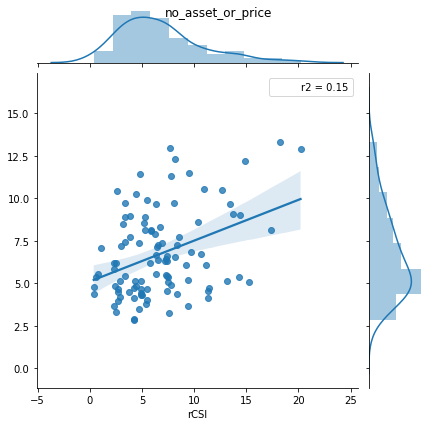

In [20]:
X_test,y_test,X_train,y_train = df_split(2015, mw_no_asset_no_price)
coef, ax = lasso_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('no_asset_or_price')

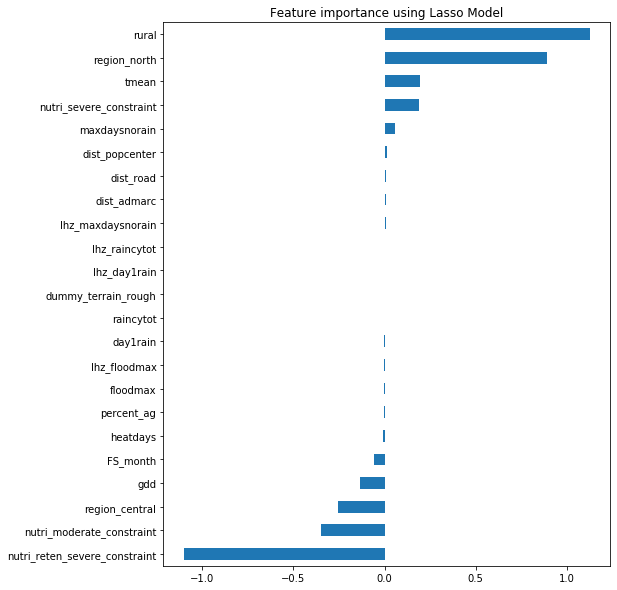

In [21]:
importance_plot(coef)

Best alpha using built-in LassoCV: 0.100000
Best score using built-in LassoCV: 0.335594
Lasso picked 45 variables and eliminated the other 43 variables


Text(0.5, 0.98, 'no_asset')

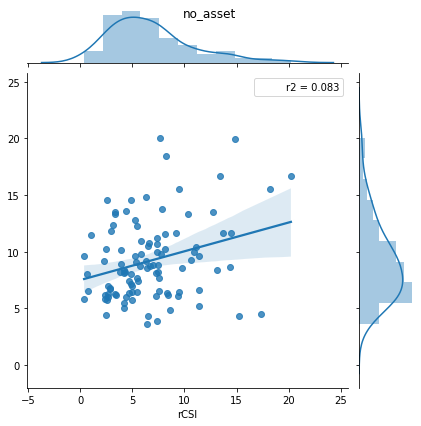

In [43]:
X_test,y_test,X_train,y_train = df_split(2015, mw_no_asset)
coef, ax = lasso_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('no_asset')

In [ ]:
coef_lasso = pd.DataFrame(coef).reset_index()
coef_lasso.columns = ['variables','coefficients']
subset = coef_lasso[abs(coef_lasso['coefficients'])>0.002]
subset['variables']
#coef_lasso

In [24]:
mw_hh_dataset

,ea_id,FCS,HDDS,rCSI,region_north,region_central,rural,lat_modified,lon_modified,dist_road,...,lag12_lhz_rice_price,lag12_lhz_nuts_price,lag12_lhz_beans_price,lag12_lhz_maize_mktthin,lag12_lhz_rice_mktthin,lag12_lhz_nuts_mktthin,lag12_lhz_beans_mktthin,raincytot,day1rain,maxdaysnorain
0,10101016,40.5,6,10,1,0,1,-9.809980,33.387299,0.62,...,181.936349,202.027204,159.499795,0.500000,0.75,0.25,1.0,1031.634971,38,97
1,10101016,28.0,5,0,1,0,1,-9.809980,33.387299,4.78,...,181.936349,202.027204,159.499795,0.500000,0.75,0.25,1.0,1031.634971,38,97
2,10101016,35.0,5,0,1,0,1,-9.809980,33.387299,3.68,...,181.936349,202.027204,159.499795,0.500000,0.75,0.25,1.0,1031.634971,38,97
3,10101016,39.0,6,0,1,0,1,-9.809980,33.387299,4.90,...,181.936349,202.027204,159.499795,0.500000,0.75,0.25,1.0,1031.634971,38,97
4,10101016,42.5,5,2,1,0,1,-9.809980,33.387299,4.78,...,181.936349,202.027204,159.499795,0.500000,0.75,0.25,1.0,1031.634971,38,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49128,31550254,79.0,5,0,0,0,0,-15.744204,35.080904,2.00,...,238.001759,280.449167,211.316057,0.375000,1.00,1.00,1.0,656.465026,66,143
49135,31550254,52.0,4,6,0,0,0,-15.808600,35.057200,0.00,...,238.001759,280.449167,211.316057,0.375000,1.00,1.00,1.0,656.465026,66,143
49142,31555614,62.5,5,0,0,0,0,-15.855200,35.073700,2.00,...,254.308555,371.310720,342.774391,0.486486,1.00,1.00,1.0,678.566860,66,147
49146,31555614,35.5,4,0,0,0,0,-15.855200,35.073700,1.00,...,254.308555,371.310720,342.774391,0.486486,1.00,1.00,1.0,678.566860,66,147


In [25]:
mw_no_asset_full = mw_hh_dataset[['ea_id','lat_modified', 'lon_modified', 'FCS','HDDS','rCSI','FS_year','dist_road',
'dist_admarc',
'dist_popcenter',
'percent_ag',
'FS_month',
'rural',
'lag1_clust_maize_price',
'lag1_lhz_maize_price',
'lag1_lhz_nuts_price',
'lag3_lhz_maize_price',
'lag6_clust_maize_price',
'lag6_clust_nuts_price',
'lag6_clust_beans_price',
'lag6_lhz_nuts_price',
'lag12_clust_maize_price',
'lag12_clust_rice_price',
'lag12_clust_nuts_price',
'lag12_clust_beans_price',
'lag12_lhz_maize_price',
'lag12_lhz_rice_price',
'lag12_lhz_nuts_price',
'maxdaysnorain',
'day1rain']]

mw_no_asset_full.to_csv("data/clean/dataset/mw_no_asset.csv",index=False)

In [ ]:
mw_no_asset_full

In [26]:
mw16= mw_no_asset_full[mw_no_asset_full['FS_year']==2016]
mw16.groupby(['lat_modified','lon_modified']).nunique()

,,ea_id,lat_modified,lon_modified,FCS,HDDS,rCSI,FS_year,dist_road,dist_admarc,dist_popcenter,...,lag6_lhz_nuts_price,lag12_clust_maize_price,lag12_clust_rice_price,lag12_clust_nuts_price,lag12_clust_beans_price,lag12_lhz_maize_price,lag12_lhz_rice_price,lag12_lhz_nuts_price,maxdaysnorain,day1rain
lat_modified,lon_modified,,,,,,,,,,,,,,,,,,,,,
-16.985500,35.249900,1,1,1,19,5,15,1,2,2,3,...,1,1,1,1,1,1,1,1,1,1
-16.952974,35.203069,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-16.943264,35.262911,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-16.934744,35.248479,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-16.928497,35.245029,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-9.663556,33.240057,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-9.604181,33.779577,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
-9.582955,33.311496,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Best alpha using built-in LassoCV: 0.000300
Best score using built-in LassoCV: 0.351276
Lasso picked 35 variables and eliminated the other 2 variables


Text(0.5, 0.98, 'no_prices')

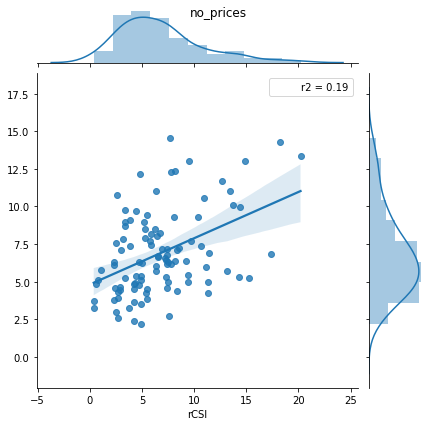

In [22]:
X_test,y_test,X_train,y_train = df_split(2015, mw_no_prices)
coef, ax = lasso_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('no_prices')

Best alpha using built-in LassoCV: 0.030000
Best score using built-in LassoCV: 0.401160
Lasso picked 58 variables and eliminated the other 43 variables


Text(0.5, 0.98, 'all_asset_all_prices')

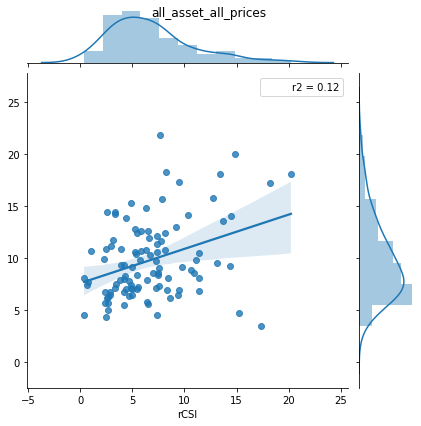

In [22]:
X_test,y_test,X_train,y_train = df_split(2015, mw_village)
coef, ax = lasso_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('all_asset_all_prices')

Best score on the training data


Text(0.5, 0.98, 'all_vars')

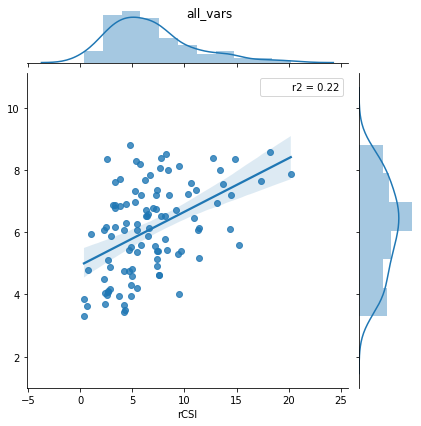

In [35]:
X_test,y_test,X_train,y_train = df_split(2015, mw_village)
ax,params,perm_imp_rfpimp = rf_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('all_vars')

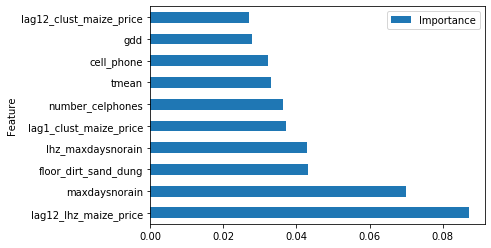

In [46]:
perm_imp_rfpimp[0:10].plot(kind = "barh")

In [44]:
perm_imp_rfpimp

,Importance
Feature,
lag12_lhz_maize_price,0.087110
maxdaysnorain,0.069868
floor_dirt_sand_dung,0.043051
lhz_maxdaysnorain,0.042879
lag1_clust_maize_price,0.037159
...,...
nutri_moderate_constraint,0.001658
region_north,0.001069
Motorcycle,0.000494


Best score on the training data


AttributeError: 'tuple' object has no attribute 'fig'

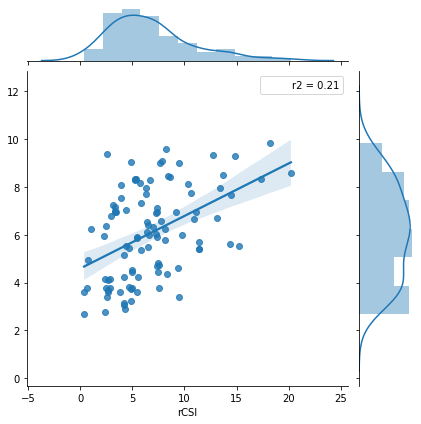

In [18]:
X_test,y_test,X_train,y_train = df_split(2015, mw_village_lag1)
ax = rf_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('rf_lag1')

In [ ]:
coef

Best alpha using built-in LassoCV: 0.010000
Best score using built-in LassoCV: 0.368732
Lasso picked 38 variables and eliminated the other 15 variables


Text(0.5, 0.98, 'asset+lag1')

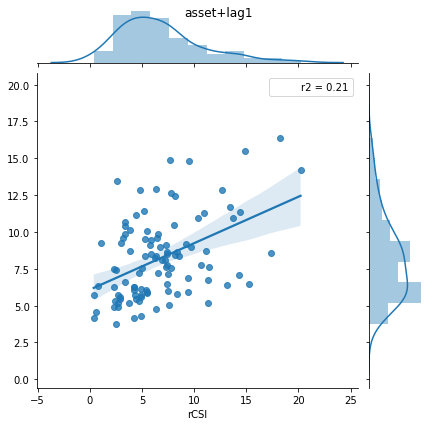

In [39]:
X_test,y_test,X_train,y_train = df_split(2015, mw_village_lag1)
coef, ax = lasso_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('asset+lag1')

Best alpha using built-in LassoCV: 0.000600
Best score using built-in LassoCV: 0.387146
Lasso picked 51 variables and eliminated the other 2 variables


Text(0.5, 0.98, 'lag3')

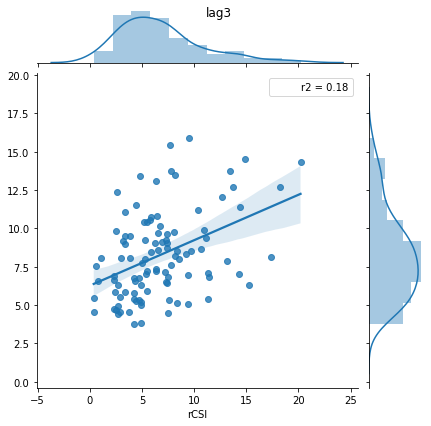

In [17]:
X_test,y_test,X_train,y_train = df_split(2015, mw_village_lag3)
coef, ax = lasso_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('lag3')

Best alpha using built-in LassoCV: 0.060000
Best score using built-in LassoCV: 0.361416
Lasso picked 27 variables and eliminated the other 28 variables


Text(0.5, 0.98, 'lag6')

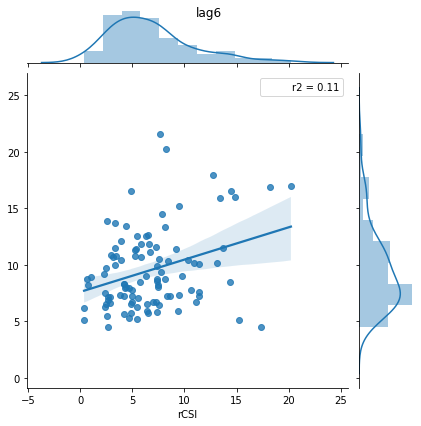

In [31]:
X_test,y_test,X_train,y_train = df_split(2015, mw_village_lag6)
coef, ax = lasso_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('lag6')

Best alpha using built-in LassoCV: 0.030000
Best score using built-in LassoCV: 0.384448
Lasso picked 42 variables and eliminated the other 28 variables


Text(0.5, 0.98, 'lag12')

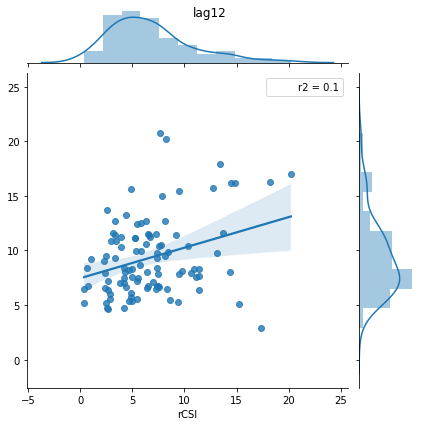

In [32]:
X_test,y_test,X_train,y_train = df_split(2015, mw_village_lag12)
coef, ax = lasso_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('lag12')

Best alpha using built-in LassoCV: 0.100000
Best score using built-in LassoCV: 0.368356
Lasso picked 33 variables and eliminated the other 36 variables


Text(0.5, 0.98, 'lag1+12')

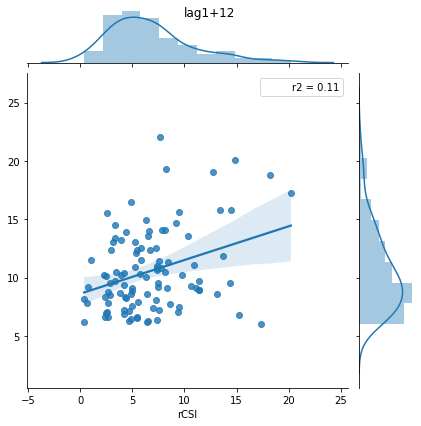

In [6]:
X_test,y_test,X_train,y_train = df_split(2015, mw_village_lag1_and_12)
coef, ax = lasso_reg(X_test,y_test,X_train,y_train)
ax
ax.fig.suptitle('lag1+12')